<a href="https://colab.research.google.com/github/Barikko/Yandex.Practicum-Projects/blob/main/%D0%9E%D0%B1%D1%89%D0%B5%D0%BF%D0%B8%D1%82_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D1%8B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект "Рынок заведений общественного питания Москвы"

Цель проекта: исследование рынка общественного питания в Москве, поиск интересных особенностей с последующей презентацией. Это исследование поможет заказчикам найти лучшее места для открытия нового заведения.

План: 
- Загрузка данных, получение общей информации
- Предобработка данных, работа с пропусками и дубликатами
- Создание новых стобцов
- Анализ данных датасета, сравнение показателей по всем категориям,  подтверждённые цифрами, графиками и выводами
- Рекомендации, основанные на анализе, по открытию новой кофейни

## Общая информация

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from folium import Marker, Map, Choropleth
import plotly.express as px
import json
from folium.plugins import MarkerCluster
from plotly import graph_objects as go

In [4]:
data = pd.read_csv('/content/moscow_places.csv')
print(data.info())
display(data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB
None


,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


До предобработки представлено 8406 заведений, вторая половины таблицы имеет много пропусков. Все столбцы имеют формат float64 или object.

## Предобработка данных

### Поиск дубликатов

In [5]:
print(data.duplicated().sum())
print(data['category'].unique())
print(data['district'].unique())

0
['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая']
['Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Западный административный округ' 'Центральный административный округ'
 'Восточный административный округ' 'Юго-Восточный административный округ'
 'Южный административный округ' 'Юго-Западный административный округ']


Явных дубликатов не обнаружено.

In [6]:
data=data.drop_duplicates(subset=['name','address'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 985.1+ KB


Неявных дубликатов не обнаружено.

### Поиск и обработка пропусков

In [7]:
print(data.isna().sum())

name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                   0
seats                3611
dtype: int64


Большое количество пропусков в столбцах price, avg_bill, middle_avg_bill, middle_coffee_cup, seats, hours. Правильным решением будет не заполнять пропуски ничем.

### Столбец street с названиями улиц из столбца с адресом

In [8]:
data['street'] = data.apply(lambda x: x['address'].split(',')[1], axis=1) 
data['street']

0                  улица Дыбенко
1                  улица Дыбенко
2             Клязьминская улица
3        улица Маршала Федоренко
4            Правобережная улица
                  ...           
8401           Профсоюзная улица
8402       Пролетарский проспект
8403            Люблинская улица
8404            Люблинская улица
8405         Россошанский проезд
Name: street, Length: 8406, dtype: object

### Столбец is_24/7 с обозначением, что заведение работает ежедневно и круглосуточно (24/7)

In [9]:
data['is_24/7'] = data.apply(lambda x: x['hours']=='ежедневно, круглосуточно', axis=1)
data['is_24/7']

0       False
1       False
2       False
3       False
4       False
        ...  
8401    False
8402    False
8403     True
8404     True
8405     True
Name: is_24/7, Length: 8406, dtype: bool

## Анализ данных

### Какие категории заведений представлены в данных?

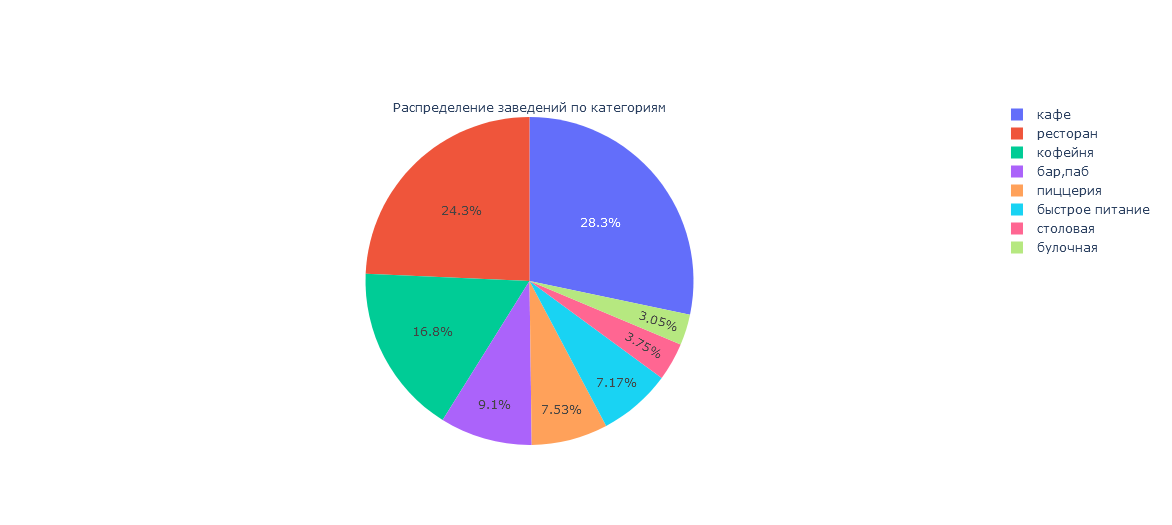

In [20]:
fig = go.Figure(data=[go.Pie(title='Распределение заведений по категориям', labels=data.groupby('category')['category'].count().index,values=data.groupby('category')['category'].count())])
Image.open("/content/newplot(3).png").show();

Наиболее крупные категории: кафе (2378 заведений), ресторан (2043) и кофейня (1413). Наименее - быстрое питание (603), столовая (315), булочная (256).

### Количество посадочных мест в местах по категориям

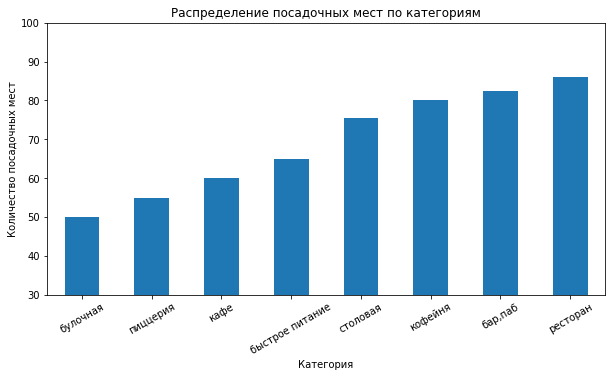

In [11]:
data.pivot_table(index = 'category',values='seats', aggfunc='median')\
.sort_values(by='seats',ascending = True).plot(kind='bar', title='Распределение посадочных мест по категориям',\
xlabel='Категория',ylabel='Количество посадочных мест', figsize=(10,5), legend = False)
plt.ylim([30, 100])
plt.xticks(rotation = 30);

Наименьшее количество мест имеют булочные и пиццерии (<60), наибольшее - рестораны и бары (>80). Связано это с размером заведений, булочные и пиццерии имеют меньшую площадь и вместимость по сравнению с людными ресторанами и барами.

### Соотношение сетевых и несетевых заведений

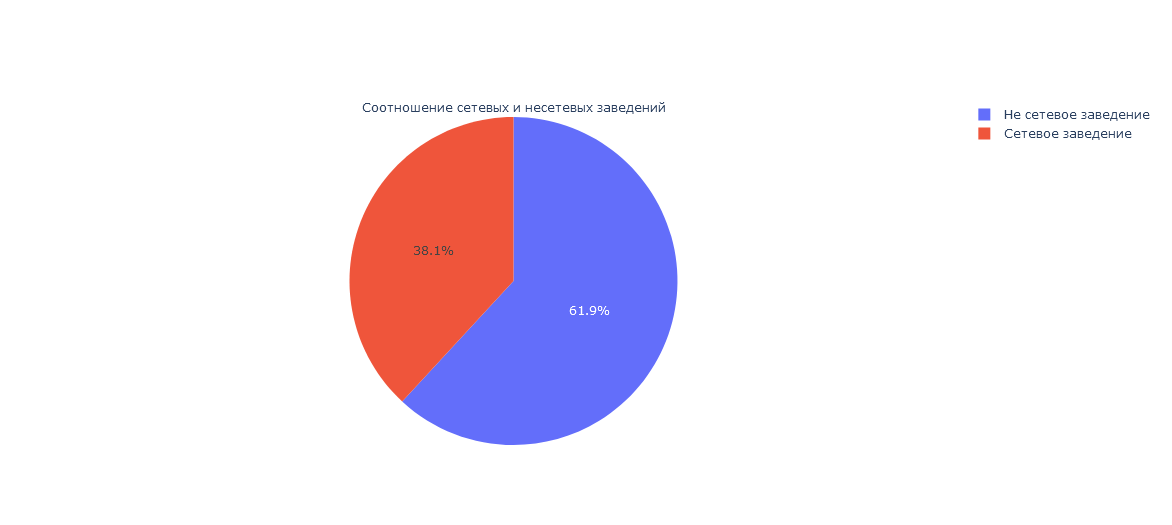

In [21]:
fig = go.Figure(data=[go.Pie(title='Соотношение сетевых и несетевых заведений',\
labels=['Не сетевое заведение','Сетевое заведение'],values=data.groupby('chain')['category'].count())])
Image.open("/content/newplot(4).png").show();

62% заведений не являются сетями, 38% - являются.

### Какие категории заведений чаще являются сетевыми?

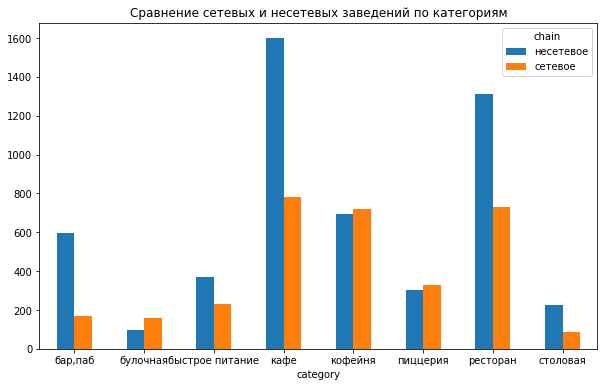

In [13]:
category_chain = data.replace([1,0], ['сетевое','несетевое']
    ).pivot_table(index = 'category', values = 'name', columns = 'chain',
aggfunc = 'count')

category_chain.plot(kind='bar',title='Сравнение сетевых и несетевых заведений по категориям', figsize=(10,6))
plt.xticks(rotation=0);

Булочные, пиццерии и кофейни чаще всего являются сетевыми заведениями – от 55% до 60+% принадлежат сети, бары и столовые имеют этот показатель от 20 до 30%.

### Топ-15 популярных сетей в Москве.

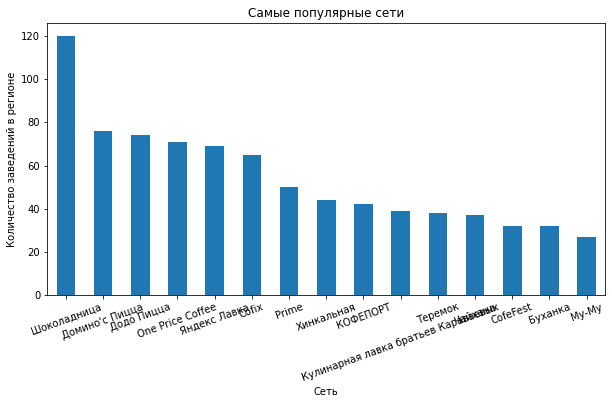

In [14]:
data.query('chain==1').pivot_table(index = 'name',values='category', aggfunc='count')\
.sort_values(by ='category', ascending = False).head(15).plot(kind='bar', title = 'Самые популярные сети',\
legend = False, xlabel='Сеть', ylabel='Количество заведений в регионе',figsize=(10,5))
plt.xticks(rotation = 20);

#В списке пропущены такие сети, как "Кафе", "Хинкальная", "Шаурма" и прочее, так как они не являются сетями.

Большинство сетей относятся к кофейням или пиццерии, самая популярная сеть - Шоколадница, насчитывающая 120 заведений.

### Количество заведений и их категории по районам

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
district,,,,,,,,
Восточный административный округ,53,25,71,272,105,72,160,40
Западный административный округ,50,37,62,239,150,71,218,24
Северный административный округ,68,39,58,235,193,77,189,41
Северо-Восточный административный округ,63,28,82,269,159,68,182,40
Северо-Западный административный округ,23,12,30,115,62,40,109,18
Центральный административный округ,364,50,87,464,428,113,670,66
Юго-Восточный административный округ,38,13,67,282,89,55,145,25
Юго-Западный административный округ,38,27,61,238,96,64,168,17
Южный административный округ,68,25,85,264,131,73,202,44


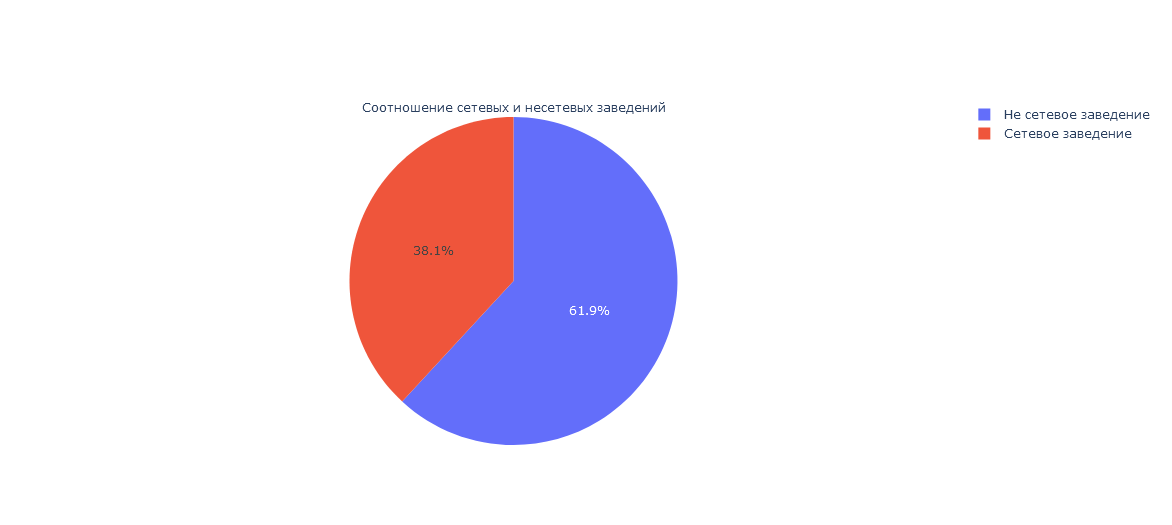

In [22]:
grp = data.pivot_table(index = 'district',values='name',columns = 'category', aggfunc='count')
display(grp)
fig = px.bar(grp, title = 'Заведения каждой категории по районам',labels={"value": "Количество","district": "Район"},)
Image.open("/content/newplot(4).png").show();

Самый популярный район - Центральный административный округ с более чем 2200 заведениями, наименее насыщенный - Северо-Западный (менее 500).

### Распределение средних рейтингов по категориям заведений

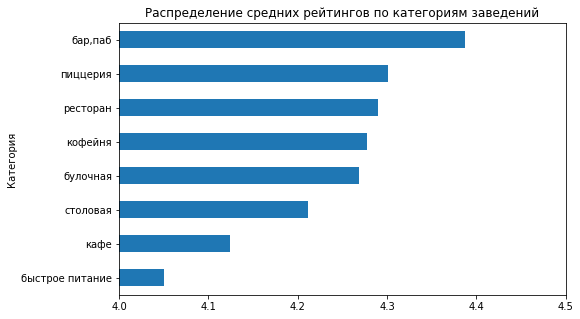

In [16]:
x=data.pivot_table(index = 'category',values='rating', aggfunc='mean')\
.sort_values(by ='rating', ascending = True).plot(kind='barh',xlabel='Категория',ylabel='',legend=False,figsize=(8,5)\
                                                  ,title='Распределение средних рейтингов по категориям заведений')
plt.xlim([4, 4.5]);

Средний рейтинги всех категорий колеблются от 4.05 (быстрое питание) до 4.4 (бар, паб), то есть разница в средних рейтингах несущественна.

### Хороплет со средним рейтингом заведений каждого района

In [17]:
hor = data.groupby('district', as_index=False)['rating'].agg('mean').sort_values(by='rating', ascending = False)
hor

,district,rating
5,Центральный административный округ,4.377520
2,Северный административный округ,4.239778
4,Северо-Западный административный округ,4.208802
8,Южный административный округ,4.184417
1,Западный административный округ,4.181551
0,Восточный административный округ,4.174185
7,Юго-Западный административный округ,4.172920
3,Северо-Восточный административный округ,4.148260
6,Юго-Восточный административный округ,4.101120


In [42]:
with open('/content/admin_level_geomap.geojson', 'r') as f:
    geo_json = json.load(f)
    
state_geo = '/content/admin_level_geomap.geojson'

moscow_lat, moscow_lng = 55.751244, 37.618423

m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

Choropleth(
    geo_data=state_geo,
    data=hor,
    columns=['district','rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
).add_to(m)

m

Самый высокий рейтинг в Центральном административном округе - 4.38, все остальные районы имеют рейтинг от 4.1 до 4.24.

### Все заведения датасета на карте с помощью кластеров.

In [ ]:
m1 = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
marker_cluster = MarkerCluster().add_to(m1)
def create_marker(row):
    Marker([row['lat'], row['lng']],
        popup=f"{row['name']}"
    ).add_to(marker_cluster)

# применяем функцию для создания маркера ко всем строкам датафрейма
data.apply(create_marker, axis=1)

m1

Огромное количество заведений (>3000) находится в центре, южные же районы имеют гораздо меньшее количество заведений.

### График распределения количества заведений и их категорий по топ-15 улицам.

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая,total
street,,,,,,,,,
проспект Мира,12,4,21,53,36,11,45,2,184
Профсоюзная улица,6,4,15,35,18,15,26,3,122
проспект Вернадского,7,1,12,25,16,12,33,2,108
Ленинский проспект,10,3,2,26,23,5,33,5,107
Ленинградский проспект,15,4,2,12,25,9,25,3,95
Дмитровское шоссе,6,2,10,23,11,8,24,4,88
Каширское шоссе,2,0,10,20,16,5,19,5,77
Варшавское шоссе,6,0,7,18,14,4,20,7,76
Ленинградское шоссе,5,2,5,13,13,3,26,3,70


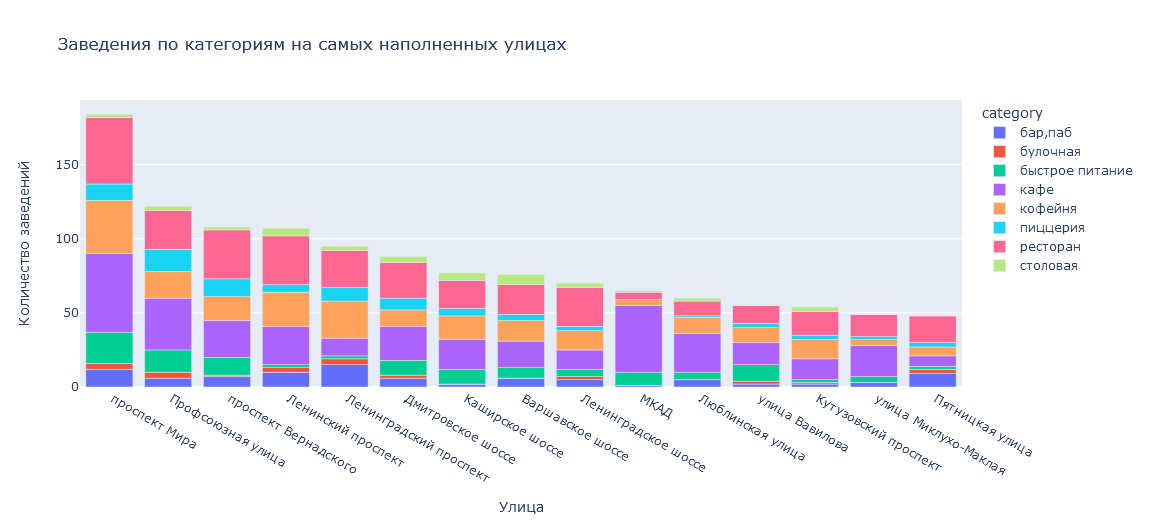

In [24]:
oh = data.pivot_table(index = 'street',values='name',columns = 'category', aggfunc='count')
oh[np.isnan(oh)] = 0
oh=oh.astype(int)
oh['total']=oh.sum(axis=1)
oh=oh.sort_values(by='total', ascending = False).head(15)
display(oh)
del oh['total']
fig = px.bar(oh, title= 'Заведения по категориям на самых наполненных улицах', labels={"value": "Количество заведений","street": "Улица"})
Image.open("/content/newplot(6).png").show();

Самое большое количество заведений находится на проспекте Мира (более 160) и Профсоюзной улице (120). Самые популярные категории: кафе и ресторан.

### Улицы, на которых находится только один объект общепита

In [26]:
z=data.pivot_table(index = 'street',values='name', aggfunc='count')\
.sort_values(by='name',ascending = True).query('name==1')
print(z.head(10))
print()
print('Количество улиц с 1 объектом -',z['name'].count())
print('Количество уникальных улиц -',len(data['street'].unique()))

                           name
street                         
 1-й Автозаводский проезд     1
 Одинцовская улица            1
 Октябрьский переулок         1
 Ордынский тупик              1
 Оренбургская улица           1
 Орловский переулок           1
 Оршанская улица              1
 Островная улица              1
 Новоясеневский тупик         1
 Отрадный проезд              1

Количество улиц с 1 объектом - 458
Количество уникальных улиц - 1448


Это небольшие непопулярные улицы, из количество составляет примерно 1/3 от общего количества улиц (458 из 1448)

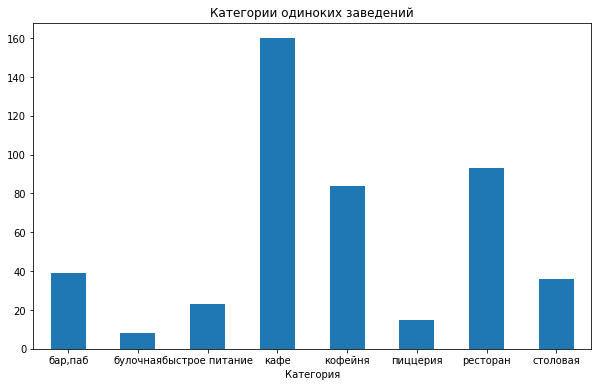

In [27]:
dataz=data.query("street in @z.index")
dataz.pivot_table(index='category',values='name',aggfunc='count')\
.plot(kind='bar',figsize=(10,6),legend=False,title='Категории одиноких заведений',xlabel='Категория')
plt.xticks(rotation=0);

### Хороплет с медианной стоимостью заказов по районам

In [28]:
ty = data.groupby('district', as_index=False)['middle_avg_bill'].agg('median')
ty.sort_values(by='middle_avg_bill', ascending=False)

,district,middle_avg_bill
1,Западный административный округ,1000.0
5,Центральный административный округ,1000.0
4,Северо-Западный административный округ,700.0
2,Северный административный округ,650.0
7,Юго-Западный административный округ,600.0
0,Восточный административный округ,575.0
3,Северо-Восточный административный округ,500.0
8,Южный административный округ,500.0
6,Юго-Восточный административный округ,450.0


In [29]:
m2 = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

Choropleth(
    geo_data=state_geo,
    data=ty,
    columns = ty.columns,
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Медианная стоимость заказов по районам',
).add_to(m2)

m2

NameError: ignored

Стоимость среднего чека уменьшатся с удалением от центрального района от 1000 у.е. до 450 за исключением Западного административного округа, где чек такой же большой, как и в центре.

### Вывод

Наиболее крупные категории: кафе (2378 заведений), ресторан (2043) и кофейня (1413). Наименее - быстрое питание (603), столовая (315), булочная (256).

Наименьшее количество мест имеют булочные и пиццерии, наибольшее - рестораны и бары, что связано с размером заведений.
62% заведений не являются сетями, 38% - являются, среди которых такие категории, как булочная, пиццерия или кофейня чаще других принадлежат к сети – от 55% до 60+%. А самая популярная сеть - Шоколадница (120 объектов).

Огромное количество заведений (>3000) находится в центре, южные же районы имеют гораздо меньшее количество заведений по сравнению с другими районами.

Самый популярный район - Центральный административный округ с более чем 2200 заведениями, наименее насыщенный - Северо-Западный (менее 500).

Категория несущественно влияет на рейтинг, он колеблется от 4.05 (быстрое питание) до 4.4 (бар, паб). 

От района рейтинг зависит больше, самый высокий в Центральном административном округе - 4.38, все остальные районы имеют рейтинг от 4.1 до 4.24.

Самое большое количество заведений находится на проспекте Мира (более 160) и Профсоюзной улице (120). Самые популярные категории: кафе и ресторан.


Стоимость среднего чека уменьшатся с удалением от центрального района от 1000 у.е. до 450 за исключением Западного административного округа, где чек такой же большой, как и в центре.

## Открытие кофейни

### Общее количество кофеен и их распределение по районам

In [30]:
cafe=data.query('category=="кофейня"')
print('Всего кофеен:',cafe['name'].count())
r = cafe.pivot_table(index='district',values='name',aggfunc='count').sort_values(by='name',ascending = False)
display(r)

Всего кофеен: 1413


,name
district,
Центральный административный округ,428
Северный административный округ,193
Северо-Восточный административный округ,159
Западный административный округ,150
Южный административный округ,131
Восточный административный округ,105
Юго-Западный административный округ,96
Юго-Восточный административный округ,89
Северо-Западный административный округ,62


Всего кофеен в датасете 1413, наибольшее их количество (428) расположено в Центральнои районе, в остальных районах их примерно одинаковое количество (от 193 до 89), за исключением Северо-Западного административного округа, в котором их всего 62.

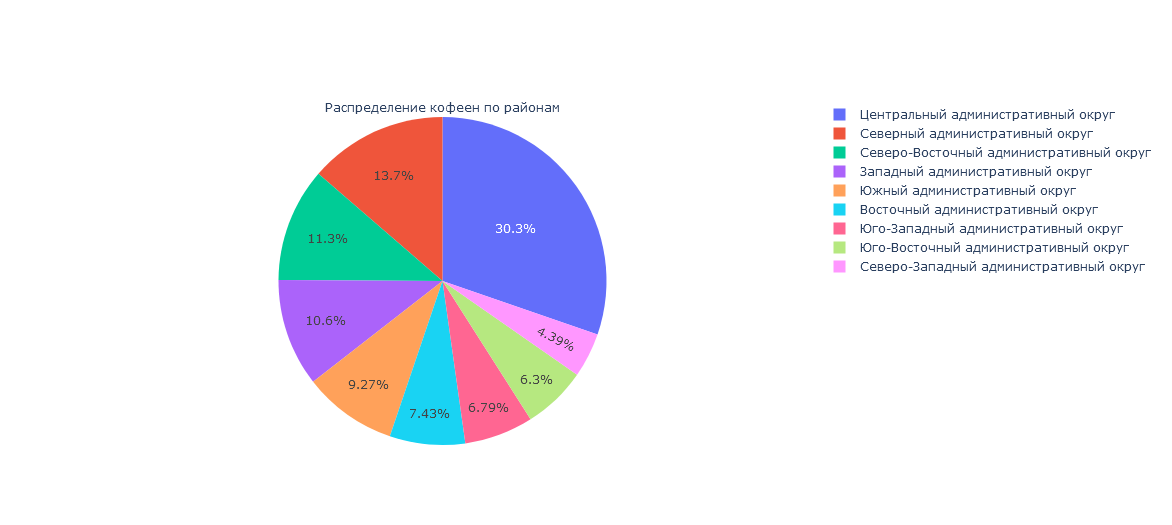

In [33]:
fg = go.Figure(data=[go.Pie(title='Распределение кофеен по районам',labels=r.index,values=r['name'])])
Image.open("/content/newplot(7).png").show();

### Круглосуточные кофейни

In [35]:
cafe=cafe.rename(columns={'is_24/7':'is_24'})
print('Всего круглосуточных кофеен',cafe.query('is_24==True')['name'].count(),\
      ', что составляет {:.1f}%'.format(cafe.query('is_24==True')['name'].count()/1413*100),'от общего числа кофеен.')

Всего круглосуточных кофеен 59 , что составляет 4.2% от общего числа кофеен.


,is_24
district,
Южный административный округ,0.007634
Юго-Восточный административный округ,0.011236
Северо-Восточный административный округ,0.018868
Северный административный округ,0.025907
Северо-Западный административный округ,0.032258
Восточный административный округ,0.047619
Западный административный округ,0.060000
Центральный административный округ,0.060748
Юго-Западный административный округ,0.072917


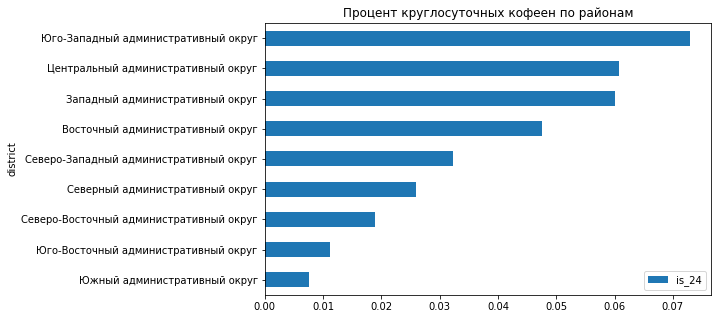

In [36]:
l=cafe.pivot_table(index = 'district',values='is_24', aggfunc='mean').sort_values(by='is_24')
display(l)
l.plot(kind='barh', figsize=(8,5), title='Процент круглосуточных кофеен по районам');

Наибольший % круглосуток находится в Юго-Западном а.о. (7,3%), наименьший - в Южном (0.76%)

### Рейтинги кофеен, распределённые по районам

,rating
district,
Западный административный округ,4.195333
Северо-Восточный административный округ,4.216981
Юго-Восточный административный округ,4.225843
Южный административный округ,4.232824
Восточный административный округ,4.282857
Юго-Западный административный округ,4.283333
Северный административный округ,4.291710
Северо-Западный административный округ,4.325806
Центральный административный округ,4.336449


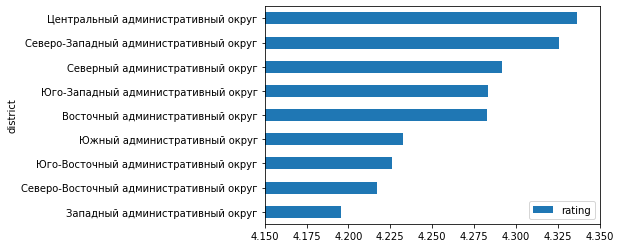

In [37]:
u=cafe.pivot_table(index='district',values='rating',aggfunc='mean').sort_values(by='rating')
display(u)
u.plot(kind='barh')
plt.xlim([4.15, 4.35]);

Самые низкии рейтинги в Западном а.о. (4.19), самые высокие - в Центральном (4.34), но эта разница несущественна.

### Стоимость чашки капучино

In [38]:
print('Средняя стоимость чашки капучино составляет',cafe['middle_coffee_cup'].median(),'рублей.')
g=cafe.pivot_table(index='district',values='middle_coffee_cup',aggfunc='median').sort_values(by='middle_coffee_cup')
display(g)

Средняя стоимость чашки капучино составляет 170.0 рублей.


,middle_coffee_cup
district,
Восточный административный округ,135.0
Юго-Восточный административный округ,147.5
Южный административный округ,150.0
Северный административный округ,159.0
Северо-Восточный административный округ,162.5
Северо-Западный административный округ,165.0
Западный административный округ,189.0
Центральный административный округ,190.0
Юго-Западный административный округ,198.0


Средняя стоимость чашки капучино составляет 170 рублей.

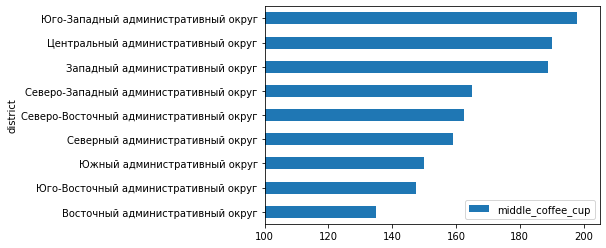

In [39]:
g.plot(kind='barh')
plt.xlim([100,205]);

### Рекомендации

,middle_coffee_cup,name
district,,
Северо-Западный административный округ,165.0,62
Юго-Восточный административный округ,147.5,89
Юго-Западный административный округ,198.0,96
Восточный административный округ,135.0,105
Южный административный округ,150.0,131
Западный административный округ,189.0,150
Северо-Восточный административный округ,162.5,159
Северный административный округ,159.0,193
Центральный административный округ,190.0,428


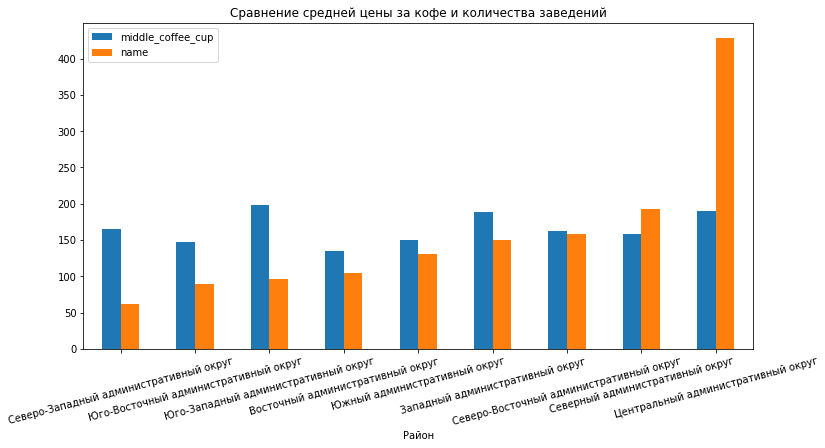

In [40]:
t=cafe.pivot_table(index = 'district', values=['middle_coffee_cup','name'],\
                 aggfunc={'middle_coffee_cup':'median','name':'count'}).sort_values(by = 'name')
display(t)
t.plot(kind='bar', figsize=(12,6),title='Сравнение средней цены за кофе и количества заведений',\
             xlabel='Район' )
plt.xticks(rotation = 15);

Выбираем не очень нагруженный район по количеству кофеен, рейтинг не учитываем, так как он примерно одинаков везде. Остановимся на Юго-Западном, так как там крайне высокая цена, и нашим преимуществом может быть цена за кофе ниже средней. Это одна из рекомендаций, далее на карте отметим маркером одно из возможных удачных мест, хорошим расположением будет рядом с парком и больницей, рядом с которыми как раз нет кофейни.

In [41]:
ca = cafe.query('district=="Юго-Западный административный округ"')

dream_lat, dream_lng = 55.613071, 37.531899

m3 = Map(location=[dream_lat, dream_lng], zoom_start=15)
marker = Marker([dream_lat, dream_lng], tooltip='Кофейня',popup='Наша кофейня')
marker.add_to(m3)
marker_cluster = MarkerCluster().add_to(m3)
def create_marker(row):
    Marker([row['lat'], row['lng']],
        popup=f"{row['name']}"
    ).add_to(marker_cluster)

# применяем функцию для создания маркера ко всем строкам датафрейма
ca.apply(create_marker, axis=1)

m3

Презентация: https://disk.yandex.ru/i/sLSnW17trTSIuw